# Veriyi Yükleme

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir=r"C:Tensorflow\f1"

train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

test_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_datagen=train_datagen.flow_from_directory(base_dir,target_size=(500,500),subset="training",batch_size=2)

test_datagen=test_datagen.flow_from_directory(base_dir,target_size=(500,500),subset="validation",batch_size=2)

Found 252 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


# Görselleştirme

(2, 500, 500, 3)
[0. 0. 1. 0.]


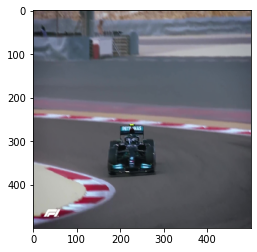

(2, 500, 500, 3)
[0. 1. 0. 0.]


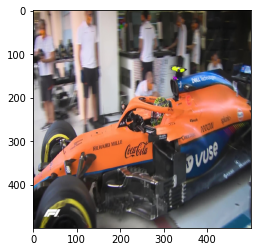

(2, 500, 500, 3)
[0. 0. 1. 0.]


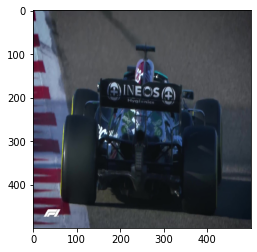

(2, 500, 500, 3)
[0. 0. 0. 1.]


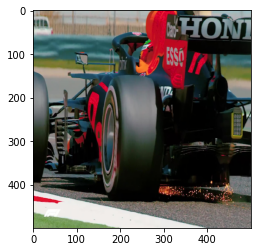

(2, 500, 500, 3)
[0. 0. 1. 0.]


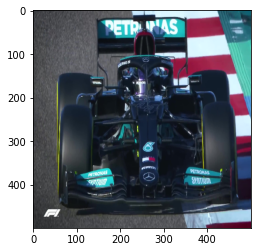

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

for _ in range(5):
    img, label = test_datagen.next()
    print(img.shape)   
    plt.imshow(img[0])
    print(label[0])   

    plt.show()

# Kütüphaneler

In [1]:
import tensorflow as tf
import numpy as np
import pylab as pl
from keras import backend as K
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras import layers,activations

# Functional Model Oluşumu

In [6]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model

In [7]:
input_=Input(shape=(500,500,3))

conv11=Conv2D(filters=4,kernel_size=(2,2),activation="elu")(input_)
max11=MaxPooling2D((2,2))(conv11)
conv12=Conv2D(filters=8,kernel_size=(2,2),activation="elu")(max11)
max12=MaxPooling2D((2,2))(conv12)
flat1=Flatten()(max12)

conv21=Conv2D(filters=4,kernel_size=(3,3),activation="elu")(input_)
max21=MaxPooling2D((2,2))(conv21)
conv22=Conv2D(filters=8,kernel_size=(2,2),activation="elu")(max21)
max22=MaxPooling2D((2,2))(conv22)
flat2=Flatten()(max22)

merge=concatenate([flat1,flat2])

fc1=Dense(50,activation="elu")(merge)
fc2=Dense(100,activation="elu")(fc1)
fc3=Dense(100,activation="elu")(fc2)
fc4=Dense(50,activation="elu")(fc3)
out=Dense(4,activation="softmax")(fc4)


model=Model(inputs=input_,outputs=out)



In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 500, 500, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 499, 499, 4)  52          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 498, 498, 4)  112         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 249, 249, 4)  0           conv2d[0][0]                     
______________________________________________________________________________________________

# Model Eğitimi

In [10]:
optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001)
loss=tf.keras.losses.CategoricalCrossentropy()

In [11]:
model.compile(optimizer=optimizer,loss=loss,metrics=["mse","accuracy"])

In [8]:
result=model.fit(train_datagen,epochs=5,verbose=1,validation_data=test_datagen)

Epoch 1/5
126/126 [==============================] - 17s 128ms/step - loss: 5.0983 - mse: 0.2566 - accuracy: 0.3730 - val_loss: 2.4020 - val_mse: 0.2745 - val_accuracy: 0.2143
Epoch 2/5
126/126 [==============================] - 16s 127ms/step - loss: 1.1310 - mse: 0.1367 - accuracy: 0.6151 - val_loss: 2.1564 - val_mse: 0.1806 - val_accuracy: 0.5714
Epoch 3/5
126/126 [==============================] - 16s 127ms/step - loss: 1.0444 - mse: 0.1265 - accuracy: 0.6667 - val_loss: 1.7579 - val_mse: 0.2120 - val_accuracy: 0.5000
Epoch 4/5
126/126 [==============================] - 17s 136ms/step - loss: 0.3375 - mse: 0.0481 - accuracy: 0.8651 - val_loss: 2.1917 - val_mse: 0.1865 - val_accuracy: 0.5000
Epoch 5/5
126/126 [==============================] - 23s 182ms/step - loss: 0.1442 - mse: 0.0176 - accuracy: 0.9603 - val_loss: 1.7470 - val_mse: 0.1600 - val_accuracy: 0.5714


In [9]:
result.history

{'loss': [5.098341464996338,
  1.1310243606567383,
  1.0444042682647705,
  0.3374820351600647,
  0.14424248039722443],
 'mse': [0.2566325068473816,
  0.13666026294231415,
  0.1264946460723877,
  0.04806957766413689,
  0.01755410246551037],
 'accuracy': [0.3730158805847168,
  0.6150793433189392,
  0.6666666865348816,
  0.8650793433189392,
  0.9603174328804016],
 'val_loss': [2.4019763469696045,
  2.1564242839813232,
  1.7578731775283813,
  2.1917247772216797,
  1.747024416923523],
 'val_mse': [0.2744902968406677,
  0.18057742714881897,
  0.21196307241916656,
  0.18647100031375885,
  0.15996204316616058],
 'val_accuracy': [0.2142857164144516,
  0.5714285969734192,
  0.5,
  0.5,
  0.5714285969734192]}

# Görselleştirme

In [10]:
acc=result.history["accuracy"]
val_acc=result.history["val_accuracy"]
acc_loss=result.history["loss"]
val_loss=result.history["val_loss"]

In [11]:
epoch=range(1,len(acc)+1)

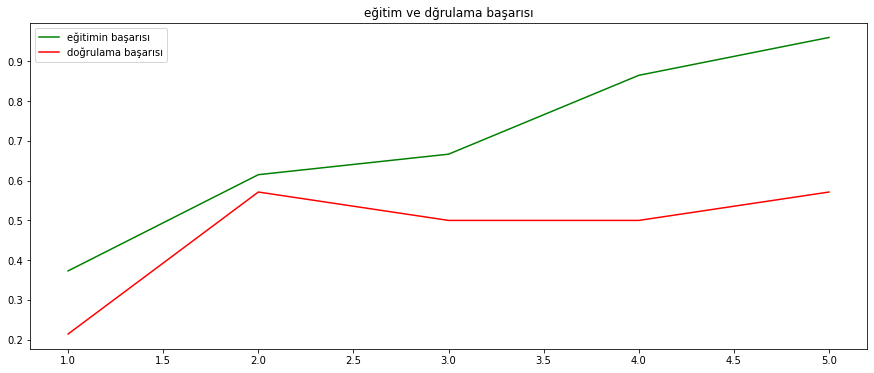

In [12]:
plt.figure(figsize=(15,6))
plt.plot(epoch,acc,label=("eğitimin başarısı"),color="g")
plt.plot(epoch,val_acc,label=("doğrulama başarısı"),color="r")
plt.title("eğitim ve dğrulama başarısı")
plt.legend()

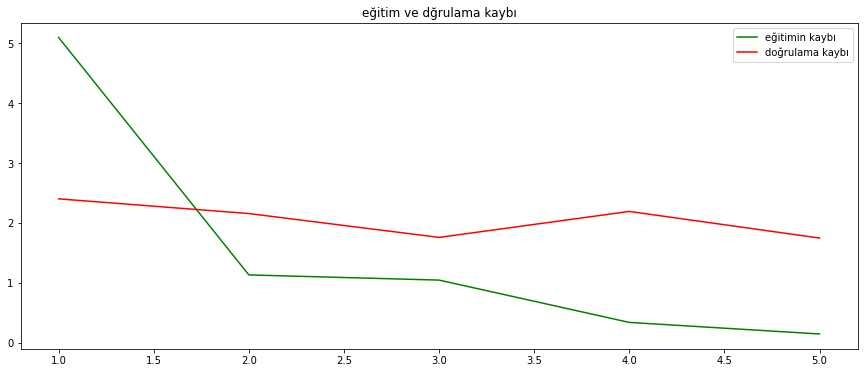

In [13]:
plt.figure(figsize=(15,6))
plt.plot(epoch,acc_loss,label=("eğitimin kaybı"),color="g")
plt.plot(epoch,val_loss,label=("doğrulama kaybı"),color="r")
plt.title("eğitim ve dğrulama kaybı")
plt.legend()